## Final Project Submission

Please fill out:
* Student name: Wema Muthoni
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


### Business Problem

Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

### Goals
Find out:
1. Which movie genres make the highets profit?
2. Which movie genres have the highest rating?
3. Which studios produce movies with the highest rating or highest gross?

### Data Understanding
im.db - Database containing information about movies. Tables to be use are:
1. Movie_basics - has 146144 rows × 6 columns with information such as title and genre
2. movie_ratings - has information on average rating and number of votes

bom.movie_gross.csv - csv file with movies' domestic and foreign gross.


1. Importing relevant libraries


In [1]:
# load the relevant libraries
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


2. Loading Datasets

In [2]:
#load csv file to dataframe 'movie_gross'
movie_gross = pd.read_csv('data/bom.movie_gross.csv')

In [3]:
#creating a connection to the database
conn = sqlite3.connect("data/im.db")
#load data
movie_basics = pd.read_sql_query("SELECT * from movie_basics", conn)
movie_ratings = pd.read_sql_query("SELECT * from movie_ratings", conn)

# Verify that result of SQL query is stored in the dataframe
print(movie_basics.head())
print(movie_ratings.head())

conn.close()

    movie_id                    primary_title              original_title  \
0  tt0063540                        Sunghursh                   Sunghursh   
1  tt0066787  One Day Before the Rainy Season             Ashad Ka Ek Din   
2  tt0069049       The Other Side of the Wind  The Other Side of the Wind   
3  tt0069204                  Sabse Bada Sukh             Sabse Bada Sukh   
4  tt0100275         The Wandering Soap Opera       La Telenovela Errante   

   start_year  runtime_minutes                genres  
0        2013            175.0    Action,Crime,Drama  
1        2019            114.0       Biography,Drama  
2        2018            122.0                 Drama  
3        2018              NaN          Comedy,Drama  
4        2017             80.0  Comedy,Drama,Fantasy  
     movie_id  averagerating  numvotes
0  tt10356526            8.3        31
1  tt10384606            8.9       559
2   tt1042974            6.4        20
3   tt1043726            4.2     50352
4   tt106024

3. Preview and understanding the data

In [4]:
#preview of movie gross
movie_gross.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [5]:
# previewing the complete dataframe
movie_gross

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [6]:
#viewing movie_basics data
movie_basics

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [7]:
#view details abot dataframe 
movie_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [8]:
#view details abot dataframe 
movie_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


#### Perform Data Cleaning Required to Answer Questions
First deal with inconsistencies such as missing data and null values


In [9]:
#drop null values in genre
movie_basics = movie_basics.dropna(subset=['genres'])
movie_basics

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146138,tt9916428,The Secret of China,The Secret of China,2019,NaN,"Adventure,History,War"
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy


In [10]:
#replace null values in 'runtime_minutes' column with median
movie_basics['runtime_minutes'] = movie_basics['runtime_minutes'].fillna(movie_basics['runtime_minutes'].median())
movie_basics

<ipython-input-10-343f537bcdc7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_basics['runtime_minutes'] = movie_basics['runtime_minutes'].fillna(movie_basics['runtime_minutes'].median())


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,87.0,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146138,tt9916428,The Secret of China,The Secret of China,2019,87.0,"Adventure,History,War"
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,87.0,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,87.0,Comedy


In [11]:
#check to confirm that null values have been filled
assert movie_basics['runtime_minutes'].isna().sum() == 0

In [12]:
#create new dataset with joined data from 'movie_basics' and 'movie_ratings'
movie_info = pd.merge(movie_basics, movie_ratings, on='movie_id')
movie_info.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,87.0,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [13]:
#view details about joined dataframe
movie_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73052 entries, 0 to 73051
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73052 non-null  object 
 1   primary_title    73052 non-null  object 
 2   original_title   73052 non-null  object 
 3   start_year       73052 non-null  int64  
 4   runtime_minutes  73052 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73052 non-null  float64
 7   numvotes         73052 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 5.0+ MB


In [14]:
#rename column 'primary_title'
movie_info.rename(columns = {'primary_title' : 'title'}, inplace=True)


In [15]:
#confirm column name change
movie_info.head()

,movie_id,title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,87.0,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [16]:
#merge 'movie_info' and 'movie_gross'
#new dataframe has all the information about movies that we need
movie_data = pd.merge(movie_info, movie_gross, on='title')
movie_data.head()

,movie_id,title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year
0,tt0315642,Wazir,Wazir,2016,103.0,"Action,Crime,Drama",7.1,15378,Relbig.,1100000.0,NaN,2016
1,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,IFC,744000.0,8000000,2012
2,tt4339118,On the Road,On the Road,2014,89.0,Drama,6.0,6,IFC,744000.0,8000000,2012
3,tt5647250,On the Road,On the Road,2016,121.0,Drama,5.7,127,IFC,744000.0,8000000,2012
4,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,Fox,58200000.0,129900000,2013


In [17]:
#view details about dataframe
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3020 entries, 0 to 3019
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         3020 non-null   object 
 1   title            3020 non-null   object 
 2   original_title   3020 non-null   object 
 3   start_year       3020 non-null   int64  
 4   runtime_minutes  3020 non-null   float64
 5   genres           3020 non-null   object 
 6   averagerating    3020 non-null   float64
 7   numvotes         3020 non-null   int64  
 8   studio           3017 non-null   object 
 9   domestic_gross   2998 non-null   float64
 10  foreign_gross    1825 non-null   object 
 11  year             3020 non-null   int64  
dtypes: float64(3), int64(3), object(6)
memory usage: 306.7+ KB


In [18]:
#change column 'foreign_gross' to numeric for easier processing
movie_data['foreign_gross'] = pd.to_numeric(movie_data['foreign_gross'], errors='coerce')

In [19]:
#check for null values
movie_data.isna().sum()

movie_id              0
title                 0
original_title        0
start_year            0
runtime_minutes       0
genres                0
averagerating         0
numvotes              0
studio                3
domestic_gross       22
foreign_gross      1199
year                  0
dtype: int64

In [20]:
#replace null values in numeric columns with median
movie_data['foreign_gross'] = movie_data['foreign_gross'].fillna(movie_data['foreign_gross'].median())
movie_data['domestic_gross'] = movie_data['domestic_gross'].fillna(movie_data['domestic_gross'].median())

In [21]:
#drop rows with null value in studio column - 3 rows
movie_data.dropna(subset=['studio'], inplace=True)

#### 2.2 Descriptive statistics

In [22]:
# getting the statistics of the numerical columns
movie_data.describe().T

,count,mean,std,min,25%,50%,75%,max
start_year,3017.0,2.013784e+03,2.464774e+00,2010.0,2012.0,2014.0,2016.0,2019.0
runtime_minutes,3017.0,1.069566e+02,2.003557e+01,3.0,93.0,104.0,118.0,272.0
averagerating,3017.0,6.459231e+00,1.009515e+00,1.6,5.9,6.6,7.1,9.2
numvotes,3017.0,6.189793e+04,1.256737e+05,5.0,2200.0,13259.0,63295.0,1841066.0
domestic_gross,3017.0,3.041484e+07,6.659494e+07,100.0,144000.0,2000000.0,32000000.0,700100000.0
foreign_gross,3017.0,5.574043e+07,1.114716e+08,600.0,13100000.0,21200000.0,33700000.0,946400000.0
year,3017.0,2.014082e+03,2.440536e+00,2010.0,2012.0,2014.0,2016.0,2018.0


#### Answering the questions
Which movie genres make the highets profit?

Which movie genres have the highest rating?

Which studios produce movies with the highest rating or highest gross?

In [23]:
#order by 'averagerating' descending
movie_high_rating = movie_data.sort_values(by='averagerating', ascending=False)[:10]
movie_high_rating


,movie_id,title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year
653,tt1455256,The Wall,The Wall,2010,78.0,Documentary,9.2,8,RAtt.,1800000.0,2700000.0,2017
172,tt6168914,The Runaways,The Runaways,2019,108.0,Adventure,9.2,47,App.,3600000.0,1100000.0,2010
2032,tt2831326,Tomorrow,Tomorrow,2015,115.0,Drama,9.1,15,UTMW,62500.0,21200000.0,2017
633,tt6216234,The Way,The Way,2016,85.0,Documentary,9.0,9,PDA,4400000.0,21200000.0,2011
1178,tt1744662,The Mayor,The Mayor,2011,68.0,"Comedy,Documentary,Drama",8.9,49,WGUSA,96800.0,21200000.0,2017
2143,tt5065924,Bethlehem,Bethlehem,2015,87.0,Comedy,8.8,19,AF,202000.0,21200000.0,2014
510,tt1375666,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066,WB,292600000.0,535700000.0,2010
2928,tt6739824,Upgrade,Upgrade,2016,87.0,Drama,8.8,69,BH Tilt,12000000.0,2400000.0,2018
828,tt1576702,Skin Trade,Skin Trade,2010,78.0,Documentary,8.8,31,Magn.,1200.0,21200000.0,2015
3019,tt9151704,Burn the Stage: The Movie,Burn the Stage: The Movie,2018,84.0,"Documentary,Music",8.8,2067,Trafalgar,4200000.0,16100000.0,2018


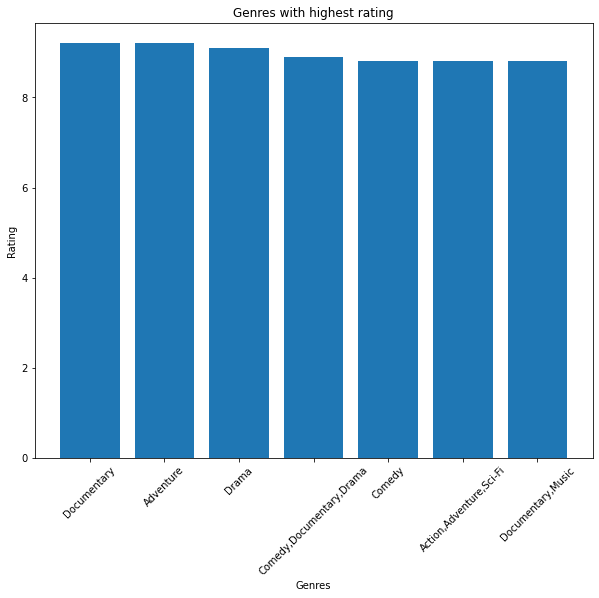

In [24]:
# plot:
fig, ax = plt.subplots(figsize=(10, 8))

#visualization using bar graph
ax.bar(movie_high_rating['genres'],movie_high_rating['averagerating'])
ax.tick_params(axis="x", labelrotation=45)
ax.set_ylabel("Rating")
ax.set_xlabel("Genres")

ax.set_title("Genres with highest rating")

plt.show()

In [25]:
#get genres with highest foreign gross
high_foreign_gross = movie_data.sort_values(by='foreign_gross', ascending=False)[:10]
high_foreign_gross['foreign_gross'] = high_foreign_gross['foreign_gross'] / 1000000
high_foreign_gross

,movie_id,title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year
1900,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi",7.3,665594,BV,459000000.0,946.4,2015
2696,tt4881806,Jurassic World: Fallen Kingdom,Jurassic World: Fallen Kingdom,2018,128.0,"Action,Adventure,Sci-Fi",6.2,219125,Uni.,417700000.0,891.8,2018
458,tt2294629,Frozen,Frozen,2013,102.0,"Adventure,Animation,Comedy",7.5,516998,BV,400700000.0,875.7,2013
457,tt1611845,Frozen,Wai nei chung ching,2010,92.0,"Fantasy,Romance",5.4,75,BV,400700000.0,875.7,2013
456,tt1323045,Frozen,Frozen,2010,93.0,"Adventure,Drama,Sport",6.2,62311,BV,400700000.0,875.7,2013
2973,tt7131870,Wolf Warrior 2,Zhan lang II,2017,123.0,"Action,Drama,Thriller",6.2,5684,HC,2700000.0,867.6,2017
1615,tt2109248,Transformers: Age of Extinction,Transformers: Age of Extinction,2014,165.0,"Action,Adventure,Sci-Fi",5.7,283486,Par.,245400000.0,858.6,2014
1781,tt2293640,Minions,Minions,2015,91.0,"Adventure,Animation,Comedy",6.4,193917,Uni.,336000000.0,823.4,2015
689,tt1477834,Aquaman,Aquaman,2018,143.0,"Action,Adventure,Fantasy",7.1,263328,WB,335100000.0,812.7,2018
422,tt1300854,Iron Man 3,Iron Man Three,2013,130.0,"Action,Adventure,Sci-Fi",7.2,692794,BV,409000000.0,805.8,2013


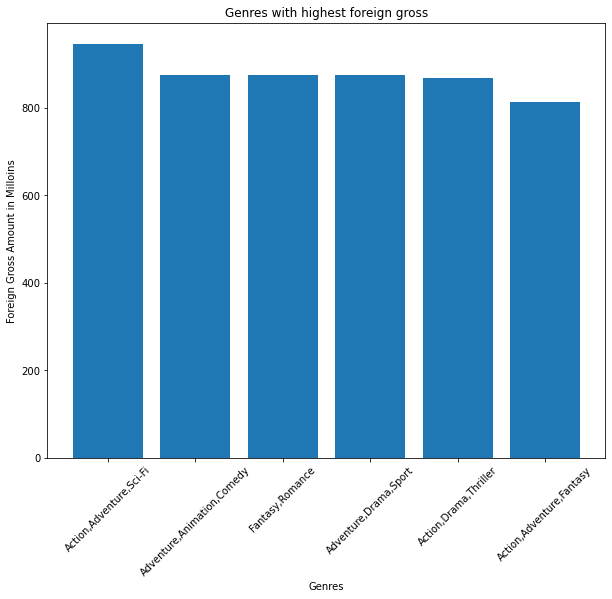

In [26]:
# plot:
fig, ax = plt.subplots(figsize=(10, 8))


ax.bar(high_foreign_gross['genres'],high_foreign_gross['foreign_gross'])
ax.tick_params(axis="x", labelrotation=45)
ax.set_ylabel("Foreign Gross Amount in Milloins")
ax.set_xlabel("Genres")

ax.set_title("Genres with highest foreign gross")

plt.show()

In [27]:
#get genres with highest domestic gross
high_domestic_gross = high_foreign_gross.sort_values(by='domestic_gross', ascending=False)
high_domestic_gross['domestic_gross'] = high_domestic_gross['domestic_gross'] / 1000000
#create new column 'total_gross' - sum of domestic and foreign gross
high_domestic_gross['total_gross'] = high_domestic_gross['domestic_gross'] + high_domestic_gross['foreign_gross']
high_domestic_gross

,movie_id,title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year,total_gross
1900,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi",7.3,665594,BV,459.0,946.4,2015,1405.4
2696,tt4881806,Jurassic World: Fallen Kingdom,Jurassic World: Fallen Kingdom,2018,128.0,"Action,Adventure,Sci-Fi",6.2,219125,Uni.,417.7,891.8,2018,1309.5
422,tt1300854,Iron Man 3,Iron Man Three,2013,130.0,"Action,Adventure,Sci-Fi",7.2,692794,BV,409.0,805.8,2013,1214.8
458,tt2294629,Frozen,Frozen,2013,102.0,"Adventure,Animation,Comedy",7.5,516998,BV,400.7,875.7,2013,1276.4
457,tt1611845,Frozen,Wai nei chung ching,2010,92.0,"Fantasy,Romance",5.4,75,BV,400.7,875.7,2013,1276.4
456,tt1323045,Frozen,Frozen,2010,93.0,"Adventure,Drama,Sport",6.2,62311,BV,400.7,875.7,2013,1276.4
1781,tt2293640,Minions,Minions,2015,91.0,"Adventure,Animation,Comedy",6.4,193917,Uni.,336.0,823.4,2015,1159.4
689,tt1477834,Aquaman,Aquaman,2018,143.0,"Action,Adventure,Fantasy",7.1,263328,WB,335.1,812.7,2018,1147.8
1615,tt2109248,Transformers: Age of Extinction,Transformers: Age of Extinction,2014,165.0,"Action,Adventure,Sci-Fi",5.7,283486,Par.,245.4,858.6,2014,1104.0
2973,tt7131870,Wolf Warrior 2,Zhan lang II,2017,123.0,"Action,Drama,Thriller",6.2,5684,HC,2.7,867.6,2017,870.3


Explore Data Distributions

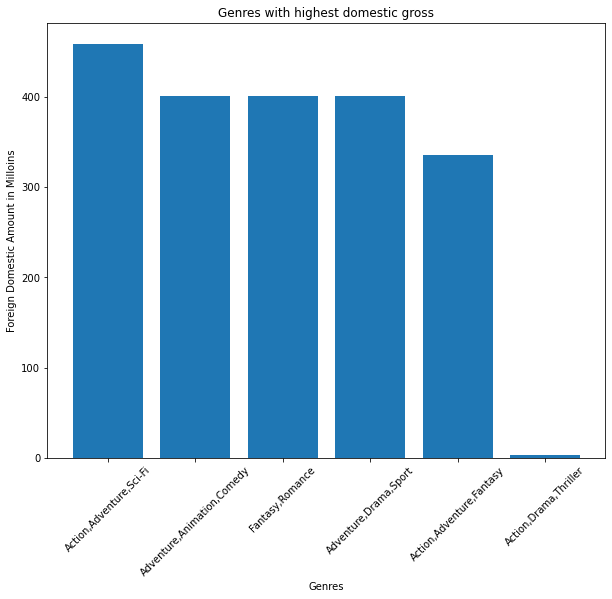

In [28]:
# plot of bar graph:
fig, ax = plt.subplots(figsize=(10, 8))


ax.bar(high_domestic_gross['genres'],high_domestic_gross['domestic_gross'])
ax.tick_params(axis="x", labelrotation=45)
ax.set_ylabel("Foreign Domestic Amount in Milloins")
ax.set_xlabel("Genres")

ax.set_title("Genres with highest domestic gross")

plt.show()

In [29]:
#order by highest grassing movie
total_gross = high_domestic_gross.sort_values(by='total_gross', ascending=False)
total_gross

,movie_id,title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year,total_gross
1900,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi",7.3,665594,BV,459.0,946.4,2015,1405.4
2696,tt4881806,Jurassic World: Fallen Kingdom,Jurassic World: Fallen Kingdom,2018,128.0,"Action,Adventure,Sci-Fi",6.2,219125,Uni.,417.7,891.8,2018,1309.5
458,tt2294629,Frozen,Frozen,2013,102.0,"Adventure,Animation,Comedy",7.5,516998,BV,400.7,875.7,2013,1276.4
457,tt1611845,Frozen,Wai nei chung ching,2010,92.0,"Fantasy,Romance",5.4,75,BV,400.7,875.7,2013,1276.4
456,tt1323045,Frozen,Frozen,2010,93.0,"Adventure,Drama,Sport",6.2,62311,BV,400.7,875.7,2013,1276.4
422,tt1300854,Iron Man 3,Iron Man Three,2013,130.0,"Action,Adventure,Sci-Fi",7.2,692794,BV,409.0,805.8,2013,1214.8
1781,tt2293640,Minions,Minions,2015,91.0,"Adventure,Animation,Comedy",6.4,193917,Uni.,336.0,823.4,2015,1159.4
689,tt1477834,Aquaman,Aquaman,2018,143.0,"Action,Adventure,Fantasy",7.1,263328,WB,335.1,812.7,2018,1147.8
1615,tt2109248,Transformers: Age of Extinction,Transformers: Age of Extinction,2014,165.0,"Action,Adventure,Sci-Fi",5.7,283486,Par.,245.4,858.6,2014,1104.0
2973,tt7131870,Wolf Warrior 2,Zhan lang II,2017,123.0,"Action,Drama,Thriller",6.2,5684,HC,2.7,867.6,2017,870.3


In [30]:
#previewing details of dataframe
total_gross.describe()

,start_year,runtime_minutes,averagerating,numvotes,domestic_gross,foreign_gross,year,total_gross
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,2014.300000,120.800000,6.520000,290331.200000,340.700000,863.340000,2014.900000,1204.040000
std,2.907844,25.472425,0.716163,255295.964375,132.819142,41.737705,2.078995,146.832257
min,2010.000000,91.000000,5.400000,75.000000,2.700000,805.800000,2013.000000,870.300000
25%,2013.000000,95.250000,6.200000,95212.500000,335.325000,832.200000,2013.000000,1150.700000
50%,2014.500000,125.500000,6.300000,241226.500000,400.700000,871.650000,2014.500000,1245.600000
75%,2016.500000,138.250000,7.175000,458620.000000,406.925000,875.700000,2016.500000,1276.400000
max,2018.000000,165.000000,7.500000,692794.000000,459.000000,946.400000,2018.000000,1405.400000


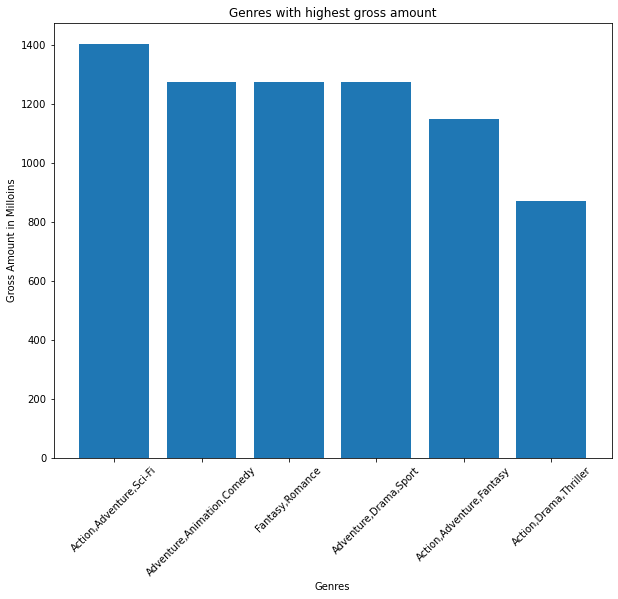

In [31]:
# plot of genres with highest gross amount:
fig, ax = plt.subplots(figsize=(10, 8))


ax.bar(total_gross['genres'],total_gross['total_gross'])
ax.tick_params(axis="x", labelrotation=45)
ax.set_ylabel("Gross Amount in Milloins")
ax.set_xlabel("Genres")

ax.set_title("Genres with highest gross amount")

plt.show()

In [32]:
#finding studio with highest profit
total_gross['studio'].value_counts()

BV      5
Uni.    2
Par.    1
WB      1
HC      1
Name: studio, dtype: int64

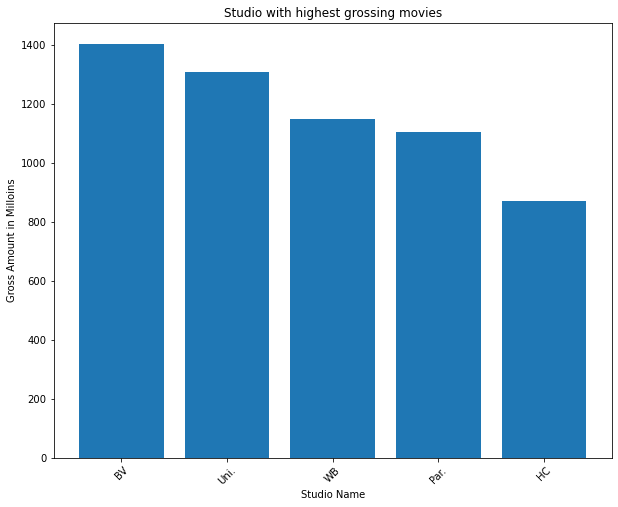

In [33]:
# bar graph
fig, ax = plt.subplots(figsize=(10, 8))


ax.bar(total_gross['studio'],total_gross['total_gross'])
ax.tick_params(axis="x", labelrotation=45)
ax.set_ylabel("Gross Amount in Milloins")
ax.set_xlabel("Studio Name")

ax.set_title("Studio with highest grossing movies")

plt.show()

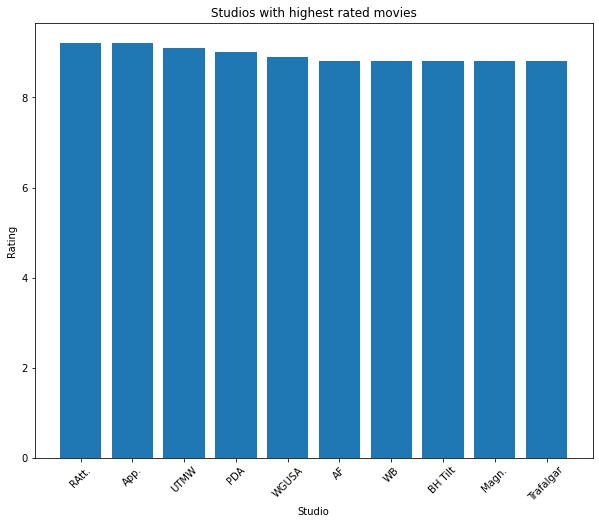

In [34]:
# visualization of Studios with highest rated movies
fig, ax = plt.subplots(figsize=(10, 8))


ax.bar(movie_high_rating['studio'],movie_high_rating['averagerating'])
ax.tick_params(axis="x", labelrotation=45)
ax.set_ylabel("Rating")
ax.set_xlabel("Studio")

ax.set_title("Studios with highest rated movies")

plt.show()

In [35]:
# To find the correlation among
# the columns using pearson method
total_gross.corr(method ='pearson')


,start_year,runtime_minutes,averagerating,numvotes,domestic_gross,foreign_gross,year,total_gross
start_year,1.000000,0.525930,0.258238,0.071251,-0.351874,-0.079209,0.924487,-0.340808
runtime_minutes,0.525930,1.000000,0.133633,0.385329,-0.193494,0.030024,0.379343,-0.166493
averagerating,0.258238,0.133633,1.000000,0.791224,0.315508,-0.041588,0.038806,0.273575
numvotes,0.071251,0.385329,0.791224,1.000000,0.479628,0.066934,-0.225837,0.452880
domestic_gross,-0.351874,-0.193494,0.315508,0.479628,1.000000,0.196331,-0.347300,0.960372
foreign_gross,-0.079209,0.030024,-0.041588,0.066934,0.196331,1.000000,-0.015827,0.461849
year,0.924487,0.379343,0.038806,-0.225837,-0.347300,-0.015827,1.000000,-0.318654
total_gross,-0.340808,-0.166493,0.273575,0.452880,0.960372,0.461849,-0.318654,1.000000


#### Results
Conclusions
Average rating for a movies is 6.4. Highest rated movie 'The Wall' is a Documentary with a 9.2 rating and lowest rated 'Justin Bieber: Never Say Never' is also a documentary with music, with a rating of 1.6.

Genres with highest domestic gross
Action,Adventure,Sci-Fi,Animation,Comedy

Genres with highest foreign gross
Action,Adventure,Sci-Fi Adventure,Animation,Comedy

Genres with the highst total gross
Action,Adventure,Sci-Fi Adventure,Animation,Comedy

Genres with the highst rating
Documentary,adventure,Drama,Comedy, action

Studios with highest rated movies
RAtt, App, UTMW, PDA, WGUSA, AF

Studio with highest grossing movies
BV. Uni, WB, Par, HC

#### Recommendations
To make a good profit Microsoft studio should create movies in genres of Action,Adventure,Sci-Fi,Animation,Comedy. They should collaborate with studioes named BV. Uni, WB, Par, HC.

To have the best rated movies they should focus on Documentary,adventure,Drama,Comedy,action genres and collaborate with studios such as RAtt, App, UTMW, PDA, WGUSA, AF.

Microsoft studio should not focus on movie runtime because there is a low correlation between runtime and totalgross and also rating.